In [3]:
import numpy as np
import sys
sys.path.append("../data/Intra/train")
sys.path.append("..")

from utils.data_utils import load_h5_data


def get_matrix_of_svg_data(data_dir):
    """
    Loads H5 data files from a given directory and returns a matrix of all data.
    Each row represents a sample, and each column represents a timepoint.
    
    Args:
        data_dir (str): Path to the directory containing H5 data.
        
    Returns:
        tuple: (data_matrix, labels)
            data_matrix: numpy array of shape (n_samples, n_channels, n_timepoints)
            labels: list of string labels corresponding to each sample
    """
    raw_data_with_labels = load_h5_data(data_dir)
    
    if not raw_data_with_labels:
        print(f"No data loaded from {data_dir}.")
        return None, None
        
    data_matrices, string_labels = zip(*raw_data_with_labels)
    
    # Convert list of matrices to a single numpy array
    # First, find the maximum number of timepoints
    max_timepoints = max(matrix.shape[1] for matrix in data_matrices)
    n_samples = len(data_matrices)
    n_channels = data_matrices[0].shape[0]
    
    # Initialize the full matrix with zeros
    data_matrix = np.zeros((n_samples, n_channels, max_timepoints))
    
    # Fill in the data
    for i, matrix in enumerate(data_matrices):
        data_matrix[i, :, :matrix.shape[1]] = matrix
        
    return data_matrix, list(string_labels)

data_dir = "../data/Intra/train"
data = get_matrix_of_svg_data(data_dir)

    Starting file discovery in ../data/Intra/train...
    File discovery completed in 0.00 seconds. Found 4 file groups.
    Starting file loading and concatenation...
    File loading and concatenation completed in 1.53 seconds
    Successfully loaded 4 data samples


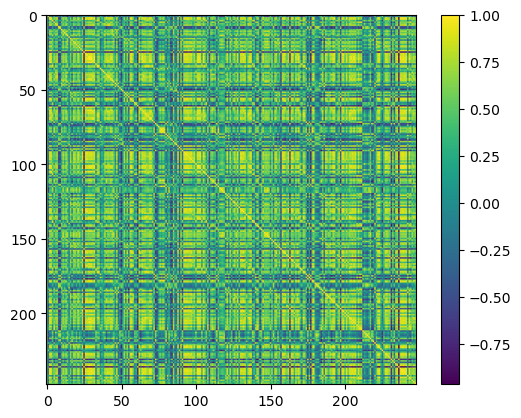

In [10]:

import matplotlib.pyplot as plt

sample = data[0][3]
# Calculate correlation matrix between sensors
correlation_matrix = np.corrcoef(sample)

correlation_matrix.shape
# plot the correlation matrix
plt.imshow(correlation_matrix)
plt.colorbar()
plt.show()



## Performing 3D PCA on the channels to see if it will look like a brain (why not)

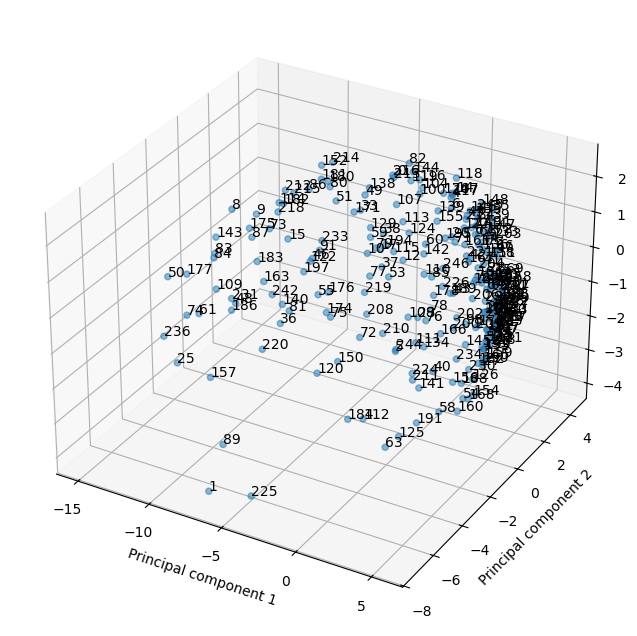

Explained variance ratio: [0.73643206 0.1948678  0.04757058]
Total explained variance: 97.89%


In [13]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets
from IPython.display import display

pca = PCA(n_components=3)
pca_result = pca.fit_transform(correlation_matrix)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], alpha=0.5)

for i in range(len(pca_result)):
    ax.text(pca_result[i, 0], pca_result[i, 1], pca_result[i, 2], str(i))

ax.set_xlabel('Principal component 1')
ax.set_ylabel('Principal component 2')
ax.set_zlabel('Principal component 3')

def update_view(elev, azim):
    ax.view_init(elev=elev, azim=azim)
    fig.canvas.draw_idle()

elev_slider = widgets.FloatSlider(
    value=20,
    min=0,
    max=180,
    step=1,
    description='Elevation:',
    continuous_update=True
)

azim_slider = widgets.FloatSlider(
    value=0,
    min=0,
    max=360,
    step=1,
    description='Azimuth:',
    continuous_update=True
)

widgets.interactive(update_view, elev=elev_slider, azim=azim_slider)

plt.show()

print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total explained variance: {sum(pca.explained_variance_ratio_):.2%}")
